<a href="https://colab.research.google.com/github/rammeshulam/ml-exercise/blob/main/clustering_basics_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Basics
Useful links:
* [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
* [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image, HTML, display


# Exercise 1
## Create a dummy dataset

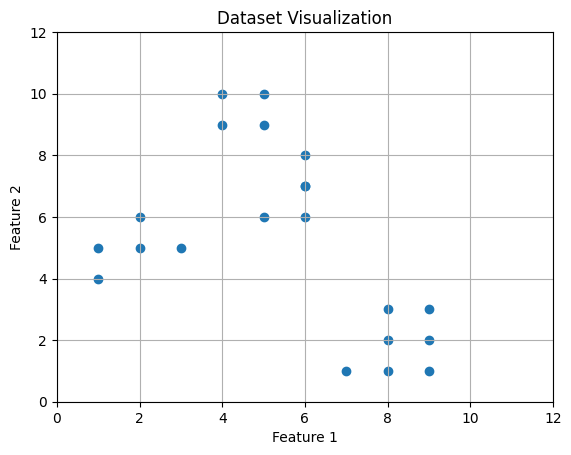

In [ ]:
# Creating the dataset
x1 = np.array([3, 1, 2, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 5])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 1, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.scatter(x1, x2, marker='o')
plt.xlim([0, 12])
plt.ylim([0, 12])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

## 1.1 Use K-Means to cluster the data into two clusters
* Apply K-Means algorithm
* Print
 * centroids,
 * the cluster id which the algorithm assigned for each data point, and
 * WCSS value (a.k.a. inertia)

## 1.2 Choosing K

### 1.2.1 Elbow method:
* Run K-Means with different K values, starting from k=1
* Plot a graph which shows WCSS (inertia) values as a function of K (hint: use [plt.plot(x,y)](https://matplotlib.org/stable/tutorials/pyplot.html))
* According to the Elbow Method, what should be the best K for this dataset?

### 1.2.2 Silhouette score
* Run K-Means with different K values, starting from **k=2**
* Plot a graph which shows Silhouette scores as a function of K
* According to the Silhouette score, what should be the best K for this dataset?

#

## 1.3 Clusters visualization
* Use the _plot_clusters()_ function below to plot clustering assignment for k=1,2,3,4 (4 separate plots)

In [ ]:
def plot_clusters(X, y_kmeans, cluster_centers):
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={len(cluster_centers)})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

# Exercise 2 - Clustering Soccer players

## 2.0 Learn the domain & load raw data
* Visit [link text](https://sofifa.com/), choose a player and review statistics
* [Sofifa-web-scraper](https://github.com/prashantghimire/sofifa-web-scraper/tree/main), gives access to the data.
* Your goal is to cluster the players into meaningful clusters, using the features in '*df_columns*' below
* Load the data into a dataframe and review it. Name it *df_full*
* create a dataframe with subset of columns *df_columns*. Name it *df*


In [ ]:
df_columns = ["crossing","finishing","heading_accuracy","short_passing","volleys","dribbling","curve","fk_accuracy","long_passing","ball_control","acceleration","sprint_speed","agility","reactions","balance","shot_power","jumping","stamina","strength","long_shots","aggression","interceptions","positioning","vision","penalties","composure","defensive_awareness","standing_tackle","sliding_tackle","gk_diving","gk_handling","gk_kicking"]
df_columns

['crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defensive_awareness',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking']

In [ ]:
data_url = 'https://github.com/prashantghimire/sofifa-web-scraper/blob/main/output/player-data-full.csv?raw=true'
df_full = pd.read_csv(data_url)
df_full

<ipython-input-10-4228e1aa7608>:2: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(data_url)


,player_id,version,name,full_name,description,image,height_cm,weight_kg,dob,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles
0,239085,2024-07-08,Erling Haaland,Erling Braut Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,94,2000-07-21,ST,...,87,38,47,29,7,14,13,11,7.0,"Acrobatic +,Power Header,Quick Step"
1,231747,2024-07-08,Kylian Mbappé,Kylian Mbappé Lottin,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,75,1998-12-20,"ST,LW",...,88,26,34,32,13,5,7,11,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,..."
2,192985,2024-07-08,Kevin De Bruyne,Kevin De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,75,1991-06-28,"CM,CAM",...,88,66,70,53,15,13,5,10,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal..."
3,231866,2024-07-08,Rodri,Rodrigo Hernández Cascante,Rodri (born 22 June 1996) is a Spanish footbal...,https://cdn.sofifa.net/players/231/866/24_120.png,191,82,1996-06-22,"CDM,CM",...,90,92,87,78,10,10,7,14,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon..."
4,202126,2024-07-08,Harry Kane,Harry Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,85,1993-07-28,ST,...,92,46,46,38,8,10,11,14,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18721,277344,2024-07-08,Éanna Fitzgerald,Eanna Fitzgerald,"Éanna Fitzgerald (Eanna Fitzgerald, born 20 Fe...",https://cdn.sofifa.net/players/277/344/24_120.png,185,75,2005-02-20,CM,...,45,38,39,46,10,9,9,10.0,9.0,NaN
18722,272761,2024-07-08,Lyu Jiaqiang,吕佳强 Lü Jiaqiang,"Lyu Jiaqiang (吕佳强, Lü Jiaqiang, born 11 April ...",https://cdn.sofifa.net/players/272/761/24_120.png,180,65,2005-04-11,CB,...,37,51,50,53,15,12,8,7.0,15.0,NaN
18723,71064,2024-07-08,Ishaan Shishodia,Ishaan Shishodia,Ishaan Shishodia (born 31 August 2005) is an I...,https://cdn.sofifa.net/players/071/064/24_120.png,177,70,2005-08-31,"CM,CAM",...,44,33,38,42,12,11,13,13.0,13.0,NaN
18724,269541,2024-07-08,Wu Yuhang,吴宇航 Wu Yuhang,"Wu Yuhang (吴宇航, Wu Yuhang, born 16 February 20...",https://cdn.sofifa.net/players/269/541/24_120.png,182,75,2001-02-16,CDM,...,39,40,45,51,11,12,5,13.0,8.0,NaN


## 2.1 Explore the data
* Ensure all data is numeric
* Ensure there are no missing values
* What is the range, mean and standard deviation of each of the columns? Are there outliers?

## 2.2 Standardize the data
KMeans which uses euclidian distance metric is sensitive to differenences in scale between features (dimentions). Although the data is all roughly at the same range, there are small differences between min valules of features. Lets standardize it.

2.2.1 Use StandardScalar to get standardized values of *df*. Name it *X*

## 2.3 Choosing K


### 2.3.1 Elbow method
* Run K-Means with different K values, starting from k=1
* Plot a graph which shows WCSS (inertia) values as a function of K (hint: use [plt.plot(x,y)](https://matplotlib.org/stable/tutorials/pyplot.html))
* According to the Elbow Method, what should be the best K for this dataset?

### 2.3.2 Silhouette score
* Run K-Means with different K values, starting from **k=2**
* Plot a graph which shows Silhouette scores as a function of K
* According to the Silhouette score, what should be the best K for this dataset?

Note that this time the graph shows a high value on k=2 and decreasing values onward. This is not helpful.

##  3. Exploring the clusters
**For the rest of this exercise, use 4 clusters (*k=4*)**

### 3.1 cluster the data
* use KMeans to cluster the data. What are the clusters' sizes?
* name the results of KMeans (column of cluster ids) as *y_kmeans*

Note that one cluster is smaller than the rest.

### 3.2 Use PCA to visualize clusters

* Use [Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimention of the data (X) to two dimentions (n_components=2). Denote the reduced projection of X as ***X_r***
* Run the visualization code below and review the output chart
* One of the clusters is indeed smaller than the rest,
* Note that two components explain ~70% of the variance

In [1]:
# Code to generate X_r:

In [ ]:
target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

# PRECENTAGE OF VARIANCE EXPLAINED FOR EACH COMPONENTS
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# PLOTTING DATA POINTS
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_kmeans == i, 0], X_r[y_kmeans == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()

## 3.3 Characterize clusters via players' positions

Positions taken from [guidetofootball.com](https://www.guidetofootball.com/tactics/playing-positions/):

![Positions](https://www.guidetofootball.com/wp-content/uploads/playing-positions.png)

The column 'positions' was not used in this analysis. The column holds the positions in which each player is playing at.


Can we tag each cluster with unique player position? are the players in each cluster tend to play at similar positions? Let's find out:
* create a copy of df_full and add it a column - the results of KMeans - cluster id (0-3) for each player. Name it *df_res*
* Use *df_res*: For each cluster, print most frequent positions for that cluster.

Note that players may have more than one position. For example, a player may have the value "CB,RB" in column 'positions'.

* What is the cluster id of Lionel Messi? Does the positions found above match Messi's position?


## 3.4 Show top players per cluster
* Use the columns 'overall_rating' and 'description' and show 3 players with highest rating from each cluster
* **BONUS:** use the column 'image' to add an image of each player. Hint: create an <image> html tag from 'image' urls and convert the dataframe .to_html(). Wrap the result with display(HTML())